<a href="https://colab.research.google.com/github/ssttv/ml-resources/blob/master/visual_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get install -y -qq software-properties-common module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!pip install ipywidgets
import ipywidgets
from ipywidgets import IntProgress

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [0]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [4]:
df = pd.read_csv('/content/drive/generic_datasets/tele_churn.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


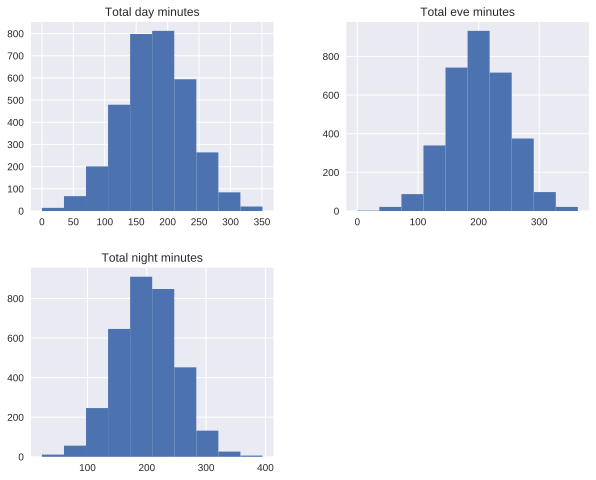

In [5]:
features = ['Total day minutes', 'Total eve minutes', 'Total night minutes']
df[features].hist(figsize=(10,8));

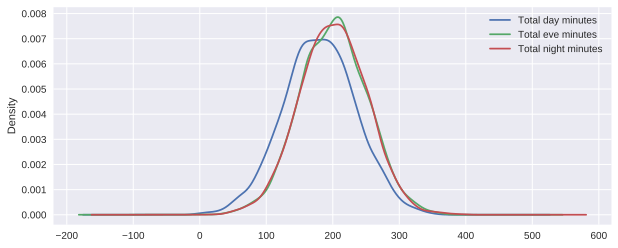

In [9]:
df[features].plot(kind='density', subplots=False, layout=(1,3), sharex=False, figsize=(10,4));

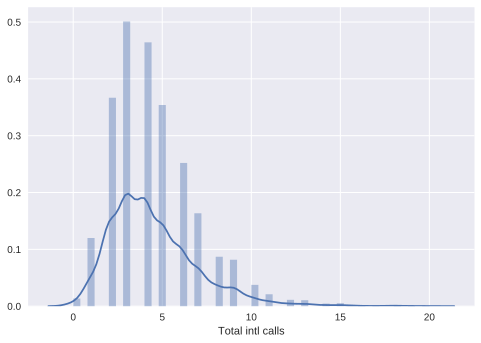

In [10]:
sns.distplot(df['Total intl calls']);

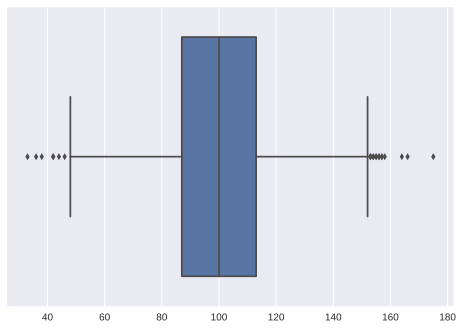

In [14]:
sns.boxplot(x=['Total night calls'], data=df);

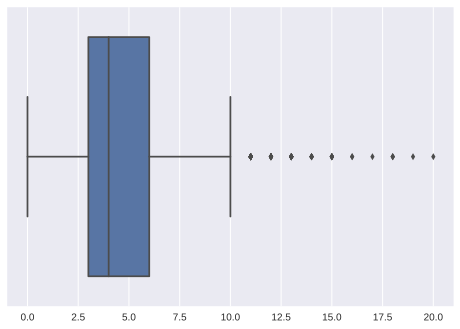

In [15]:
sns.boxplot(x=['Total intl calls'], data=df);

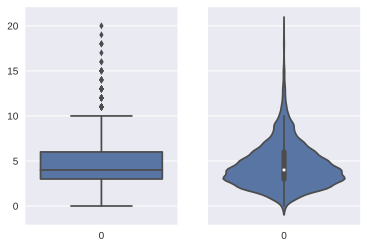

In [16]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

In [17]:
df[features].describe()

,Total day minutes,Total eve minutes,Total night minutes
count,3333.000000,3333.000000,3333.000000
mean,179.775098,200.980348,200.872037
std,54.467389,50.713844,50.573847
min,0.000000,0.000000,23.200000
25%,143.700000,166.600000,167.000000
50%,179.400000,201.400000,201.200000
75%,216.400000,235.300000,235.300000
max,350.800000,363.700000,395.000000
